## Regression

This Notebook gives an overview regarding the regression models. In this notebook we'll try to cover the few concepts

-  Linear Regression using Sklearn
-  Comparing different Linear regression Models 
-  Polynomial Regression


In [1]:
# Loading the libraries
from sklearn import datasets, model_selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

For linear regression models we will try with only one column so we can plot the graph too. 

In [2]:
#loading the data
diabetes = datasets.load_diabetes()

X = diabetes.data
#reducing the dimensions
X = X[:, np.newaxis, 2]
Y = diabetes.target

In [3]:
X_df = pd.DataFrame(X, columns=["Inputs"])
X_df.head()

,Inputs
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385


In [4]:
Y_df = pd.DataFrame(Y, columns=["targets"])
Y_df.head()

,targets
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [5]:
# Splitting data into test and train sets
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=31)

In [6]:
len(X_train)

331

### Creating different Regression Models

__Linear regression__ minimizes the sum of squared distances. Suppose assume our model is in the form of equation in which we need to determine the proper weights.
$$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$$

for more info refer the [link](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) <br />

$$\underset{w}{min\,} {|| X w - y||_2}^2$$


Accuracy : 0.427049651842


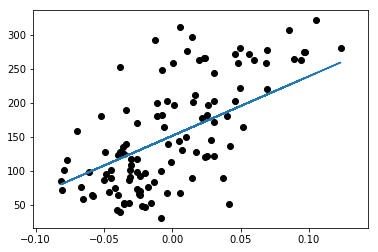

In [7]:
# Linear Regression 

from sklearn import linear_model

linearRegressionModel = linear_model.LinearRegression()
linearRegressionModel.fit(X_train,Y_train)

linearRegressionModelPredict = linearRegressionModel.predict(X_test)
score = linearRegressionModel.score(X_test, Y_test)

print("Accuracy :", score)

plt.scatter(X_test, Y_test, color='black')
plt.plot(X_test, linearRegressionModelPredict)
plt.show()


__Ridge Regression or Linear Regression with Regularization Coefficient__ also tries to reduce the sum of squared distances from the points to equation, by additionally imposing the regularization coefficient. for more information refer [link](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) 
$$\underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2}$$

Accuracy : 0.425844297903


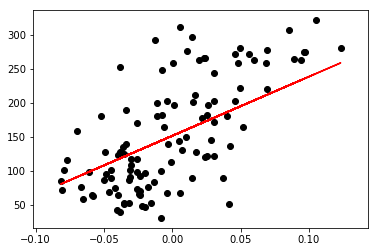

In [8]:
from sklearn import linear_model

RidgeModel = linear_model.Ridge(alpha = 0.005)
RidgeModel.fit(X_train, Y_train)

RidgeModelPredict = RidgeModel.predict(X_test)
score = RidgeModel.score(X_test, Y_test)

print("Accuracy :", score)
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, RidgeModelPredict, color="red")
plt.show()

### Polynomial Regression 

For more documentation refer the links provided
- [link 1](http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html)
- [link 2](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

In [9]:
from sklearn import linear_model # for regression model
from sklearn import preprocessing # for making into polynomial expression 
from sklearn import pipeline # executing multiple commands at a time
from sklearn import datasets # importing the data
from sklearn import model_selection # for splitting the data into test and training set

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

#loading the data
housesData = datasets.load_boston()
X = pd.DataFrame(housesData.data, columns=housesData.feature_names)
Y = pd.DataFrame(housesData.target, columns=["targets"])

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
Y.info()

#split the data into test and training set
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=99)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
targets    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


Polynomial regression using multi Inputs

In [11]:
#Create a polynomial Expression without using pipeline

degrees = [1,2,3,4,5]
for deg in degrees:
    poly = preprocessing.PolynomialFeatures(deg)
    X_train_ = poly.fit_transform(X_train)
    model = linear_model.LinearRegression(fit_intercept=False)
    model.fit(X_train_, Y_train)
    
    accuracy = model.score(X_train_, Y_train)
    print("Accuracy for training " ,  deg , " is : ", accuracy)
    X_test_ = poly.fit_transform(X_test)
    accuracy = model.score(X_test_, Y_test)
    print("Accuracy for testing  " ,  deg , " is : ", accuracy)
    
    

Accuracy for training  1  is :  0.756122108276
Accuracy for testing   1  is :  0.68716355346
Accuracy for training  2  is :  0.941455086567
Accuracy for testing   2  is :  0.442758970536
Accuracy for training  3  is :  1.0
Accuracy for testing   3  is :  -2056.70635636
Accuracy for training  4  is :  1.0
Accuracy for testing   4  is :  -107.10963264
Accuracy for training  5  is :  1.0
Accuracy for testing   5  is :  -217.667429626


In [12]:
import warnings
warnings.filterwarnings('ignore')

#Creating a model using pipeline
for deg in range(1,6):
    model = pipeline.Pipeline([('poly', preprocessing.PolynomialFeatures(deg)),
                      ('ridge', linear_model.Ridge(alpha=0.1))])
    model.fit(X_train,Y_train)
    accuracy = model.score(X_train, Y_train)
    print("Accuracy Score for training at ", deg, " is :", accuracy)
    accuracy = model.score(X_test, Y_test)
    print("Accuracy Score for testing at  ", deg, " is :", accuracy)
    

Accuracy Score for training at  1  is : 0.756073654009
Accuracy Score for testing at   1  is : 0.685878732035
Accuracy Score for training at  2  is : 0.938915091158
Accuracy Score for testing at   2  is : 0.714157125417
Accuracy Score for training at  3  is : -15.1331323117
Accuracy Score for testing at   3  is : -468.063089523
Accuracy Score for training at  4  is : -30922.2149095
Accuracy Score for testing at   4  is : -101426451.947
Accuracy Score for training at  5  is : -1.8378537993
Accuracy Score for testing at   5  is : -21593.5015864


Polynomial Regression using single Input

In [13]:
housesData = datasets.load_boston()

X = housesData.data
X = X[:, np.newaxis, 2]
Y = housesData.target

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=67)

In [14]:
for deg in range(1,6):
    model = pipeline.Pipeline([('poly', preprocessing.PolynomialFeatures(deg)),
                      ('ridge', linear_model.Ridge(alpha=0.1))])
    model.fit(X_train,Y_train)
    accuracy = model.score(X_train, Y_train)
    print("Accuracy Score for training at ", deg, " is :", accuracy)
    accuracy = model.score(X_test, Y_test)
    print("Accuracy Score for testing at  ", deg, " is :", accuracy)
    

Accuracy Score for training at  1  is : 0.201935676633
Accuracy Score for testing at   1  is : 0.279689292554
Accuracy Score for training at  2  is : 0.23594195126
Accuracy Score for testing at   2  is : 0.322442395521
Accuracy Score for training at  3  is : 0.24600593571
Accuracy Score for testing at   3  is : 0.319487780466
Accuracy Score for training at  4  is : 0.249097669539
Accuracy Score for testing at   4  is : 0.313470002006
Accuracy Score for training at  5  is : 0.249147408129
Accuracy Score for testing at   5  is : 0.311301845569
